In [1]:
pip install pandas numpy matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\smp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Cargar el archivo CSV
bank_data = pd.read_csv('C:\\Users\\smp\\OneDrive - Grupo JJChicolino\\THE POWER\PYTHON\proyecto pyhton\\bank-additional.csv')

# Verificar las primeras filas del dataset
bank_data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [5]:
# Cargar las hojas de Excel
excel_data = pd.read_excel('C:\\Users\\smp\\OneDrive - Grupo JJChicolino\\THE POWER\\PYTHON\\proyecto pyhton\\customer-details.xlsx', sheet_name=None)

# Ver las hojas disponibles
excel_data.keys()

dict_keys(['2012', '2013', '2014'])

In [6]:
# Revisar los tipos de datos
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

In [7]:
# Eliminar la columna 'Unnamed: 0' que no es relevante
bank_data = bank_data.drop(columns=['Unnamed: 0'])

In [8]:
# Ver el número de valores nulos en cada columna
print(bank_data.isnull().sum())

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64


In [9]:
# Rellenar los valores nulos en 'age' con la media
bank_data['age'] = bank_data['age'].fillna(bank_data['age'].mean())

In [10]:
# Rellenar los valores nulos en las columnas categóricas con la moda
bank_data['job'] = bank_data['job'].fillna(bank_data['job'].mode()[0])
bank_data['marital'] = bank_data['marital'].fillna(bank_data['marital'].mode()[0])
bank_data['education'] = bank_data['education'].fillna(bank_data['education'].mode()[0])

In [11]:
# Rellenar los valores nulos en columnas binarias con la moda
bank_data['default'] = bank_data['default'].fillna(bank_data['default'].mode()[0])
bank_data['housing'] = bank_data['housing'].fillna(bank_data['housing'].mode()[0])
bank_data['loan'] = bank_data['loan'].fillna(bank_data['loan'].mode()[0])

In [12]:
# Convertir las columnas a tipo numérico
bank_data['cons.price.idx'] = pd.to_numeric(bank_data['cons.price.idx'], errors='coerce')
bank_data['euribor3m'] = pd.to_numeric(bank_data['euribor3m'], errors='coerce')
bank_data['nr.employed'] = pd.to_numeric(bank_data['nr.employed'], errors='coerce')

In [14]:
bank_data['cons.price.idx'] = bank_data['cons.price.idx'].fillna(bank_data['cons.price.idx'].mean())
bank_data['euribor3m'] = bank_data['euribor3m'].fillna(bank_data['euribor3m'].mean())
bank_data['nr.employed'] = bank_data['nr.employed'].fillna(bank_data['nr.employed'].mean())

In [15]:
# Ver si aún hay valores nulos
print(bank_data.isnull().sum())

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx    43000
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
date                248
latitude              0
longitude             0
id_                   0
dtype: int64


In [ ]:
bank_data['date'] = bank_data['date'].fillna('2000-01-01')

In [18]:
print(bank_data.isnull().sum())

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
y                0
date             0
latitude         0
longitude        0
id_              0
dtype: int64


In [25]:
bank_data.to_csv('bank_data_limpio.csv', index=False)

In [26]:
# Obtener resumen estadístico para las columnas numéricas
bank_data.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,euribor3m,nr.employed,latitude,longitude
count,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.0,43000.0,43000.000000,43000.000000
mean,39.977112,0.000070,0.547070,0.151907,257.739279,2.567233,962.330953,0.174023,0.077128,1.0,5191.0,36.856697,-95.939067
std,9.796830,0.008352,0.497785,0.358935,258.666033,2.772294,187.260394,0.497366,1.573898,0.0,0.0,7.225948,16.752282
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,1.0,5191.0,24.396000,-124.997000
25%,33.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,1.0,5191.0,30.614750,-110.494250
50%,39.977112,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,1.0,5191.0,36.761000,-95.899500
75%,46.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,1.0,5191.0,43.113250,-81.427750
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,1.0,5191.0,49.384000,-66.937000


In [28]:
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_columns = bank_data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con solo las columnas numéricas
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print(corr_matrix)

                   age   default   housing      loan  duration  campaign  \
age           1.000000  0.004560 -0.000958 -0.000709 -0.000069  0.005070   
default       0.004560  1.000000 -0.003587 -0.003535 -0.004986 -0.003718   
housing      -0.000958 -0.003587  1.000000  0.035474 -0.008990 -0.010913   
loan         -0.000709 -0.003535  0.035474  1.000000 -0.000680  0.004180   
duration     -0.000069 -0.004986 -0.008990 -0.000680  1.000000 -0.071956   
campaign      0.005070 -0.003718 -0.010913  0.004180 -0.071956  1.000000   
pdays        -0.033416  0.001636 -0.009509 -0.000276 -0.047632  0.053292   
previous      0.022782  0.002676  0.019846 -0.001136  0.021285 -0.079603   
emp.var.rate -0.002766  0.004367 -0.058408  0.001046 -0.027158  0.152084   
euribor3m          NaN       NaN       NaN       NaN       NaN       NaN   
nr.employed        NaN       NaN       NaN       NaN       NaN       NaN   
latitude      0.000747  0.000630 -0.002042  0.000206 -0.004131 -0.009589   
longitude   

In [29]:
# Rellenar NaN en euribor3m y nr.employed con la media
bank_data['euribor3m'] = bank_data['euribor3m'].fillna(bank_data['euribor3m'].mean())
bank_data['nr.employed'] = bank_data['nr.employed'].fillna(bank_data['nr.employed'].mean())

In [30]:
# Comprobar si aún hay valores nulos
print(bank_data.isnull().sum())

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
y                0
date             0
latitude         0
longitude        0
id_              0
dtype: int64


In [31]:
print(corr_matrix)

                   age   default   housing      loan  duration  campaign  \
age           1.000000  0.004560 -0.000958 -0.000709 -0.000069  0.005070   
default       0.004560  1.000000 -0.003587 -0.003535 -0.004986 -0.003718   
housing      -0.000958 -0.003587  1.000000  0.035474 -0.008990 -0.010913   
loan         -0.000709 -0.003535  0.035474  1.000000 -0.000680  0.004180   
duration     -0.000069 -0.004986 -0.008990 -0.000680  1.000000 -0.071956   
campaign      0.005070 -0.003718 -0.010913  0.004180 -0.071956  1.000000   
pdays        -0.033416  0.001636 -0.009509 -0.000276 -0.047632  0.053292   
previous      0.022782  0.002676  0.019846 -0.001136  0.021285 -0.079603   
emp.var.rate -0.002766  0.004367 -0.058408  0.001046 -0.027158  0.152084   
euribor3m          NaN       NaN       NaN       NaN       NaN       NaN   
nr.employed        NaN       NaN       NaN       NaN       NaN       NaN   
latitude      0.000747  0.000630 -0.002042  0.000206 -0.004131 -0.009589   
longitude   

In [32]:
bank_data = bank_data.drop(columns=['pdays'])

In [35]:
# Seleccionar solo las columnas numéricas
numeric_columns = bank_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print(corr_matrix)

                   age   default   housing      loan  duration  campaign  \
age           1.000000  0.004560 -0.000958 -0.000709 -0.000069  0.005070   
default       0.004560  1.000000 -0.003587 -0.003535 -0.004986 -0.003718   
housing      -0.000958 -0.003587  1.000000  0.035474 -0.008990 -0.010913   
loan         -0.000709 -0.003535  0.035474  1.000000 -0.000680  0.004180   
duration     -0.000069 -0.004986 -0.008990 -0.000680  1.000000 -0.071956   
campaign      0.005070 -0.003718 -0.010913  0.004180 -0.071956  1.000000   
previous      0.022782  0.002676  0.019846 -0.001136  0.021285 -0.079603   
emp.var.rate -0.002766  0.004367 -0.058408  0.001046 -0.027158  0.152084   
euribor3m          NaN       NaN       NaN       NaN       NaN       NaN   
nr.employed        NaN       NaN       NaN       NaN       NaN       NaN   
latitude      0.000747  0.000630 -0.002042  0.000206 -0.004131 -0.009589   
longitude     0.005962 -0.000234 -0.003038  0.000798  0.003563 -0.000568   

           

In [39]:
# Seleccionar solo las columnas numéricas
numerical_data = bank_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numerical_data.corr()

# Mostrar la matriz de correlación
print(corr_matrix)

                   age   default   housing      loan  duration  campaign  \
age           1.000000  0.004560 -0.000958 -0.000709 -0.000069  0.005070   
default       0.004560  1.000000 -0.003587 -0.003535 -0.004986 -0.003718   
housing      -0.000958 -0.003587  1.000000  0.035474 -0.008990 -0.010913   
loan         -0.000709 -0.003535  0.035474  1.000000 -0.000680  0.004180   
duration     -0.000069 -0.004986 -0.008990 -0.000680  1.000000 -0.071956   
campaign      0.005070 -0.003718 -0.010913  0.004180 -0.071956  1.000000   
previous      0.022782  0.002676  0.019846 -0.001136  0.021285 -0.079603   
emp.var.rate -0.002766  0.004367 -0.058408  0.001046 -0.027158  0.152084   
latitude      0.000747  0.000630 -0.002042  0.000206 -0.004131 -0.009589   
longitude     0.005962 -0.000234 -0.003038  0.000798  0.003563 -0.000568   

              previous  emp.var.rate  latitude  longitude  
age           0.022782     -0.002766  0.000747   0.005962  
default       0.002676      0.004367  0.000

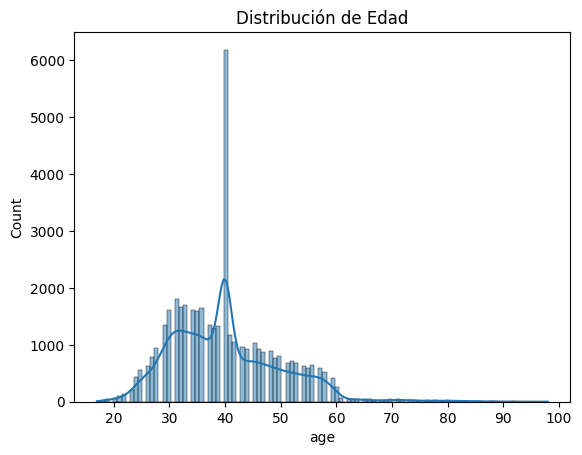

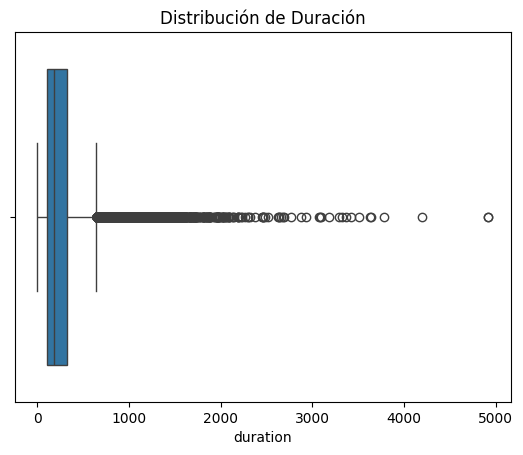

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la edad
sns.histplot(bank_data['age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

# Boxplot de la duración
sns.boxplot(x=bank_data['duration'])
plt.title('Distribución de Duración')
plt.show()

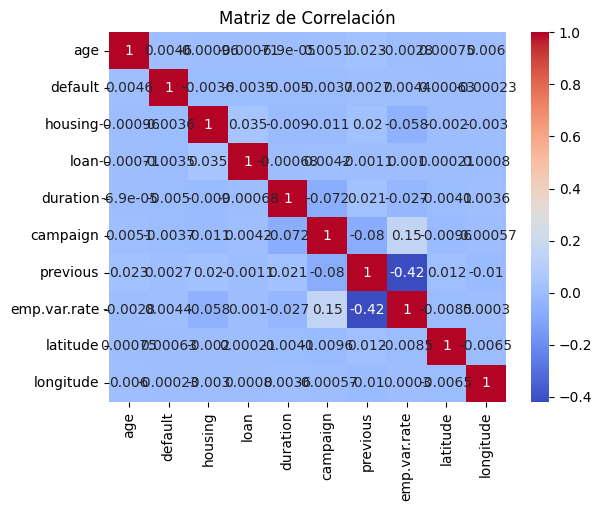

In [41]:
# Heatmap de correlación
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()